# Online Shoppers Purchasing Intention Prediction

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier

## Uploading dataset

In [2]:
df = pd.read_csv('data/online_shoppers_intention.csv')
df.shape

(12330, 18)

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## EDA

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# Search for null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
# Search for duplicate values
df.duplicated().sum()

125

In [8]:
# We get rid of duplicated data
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

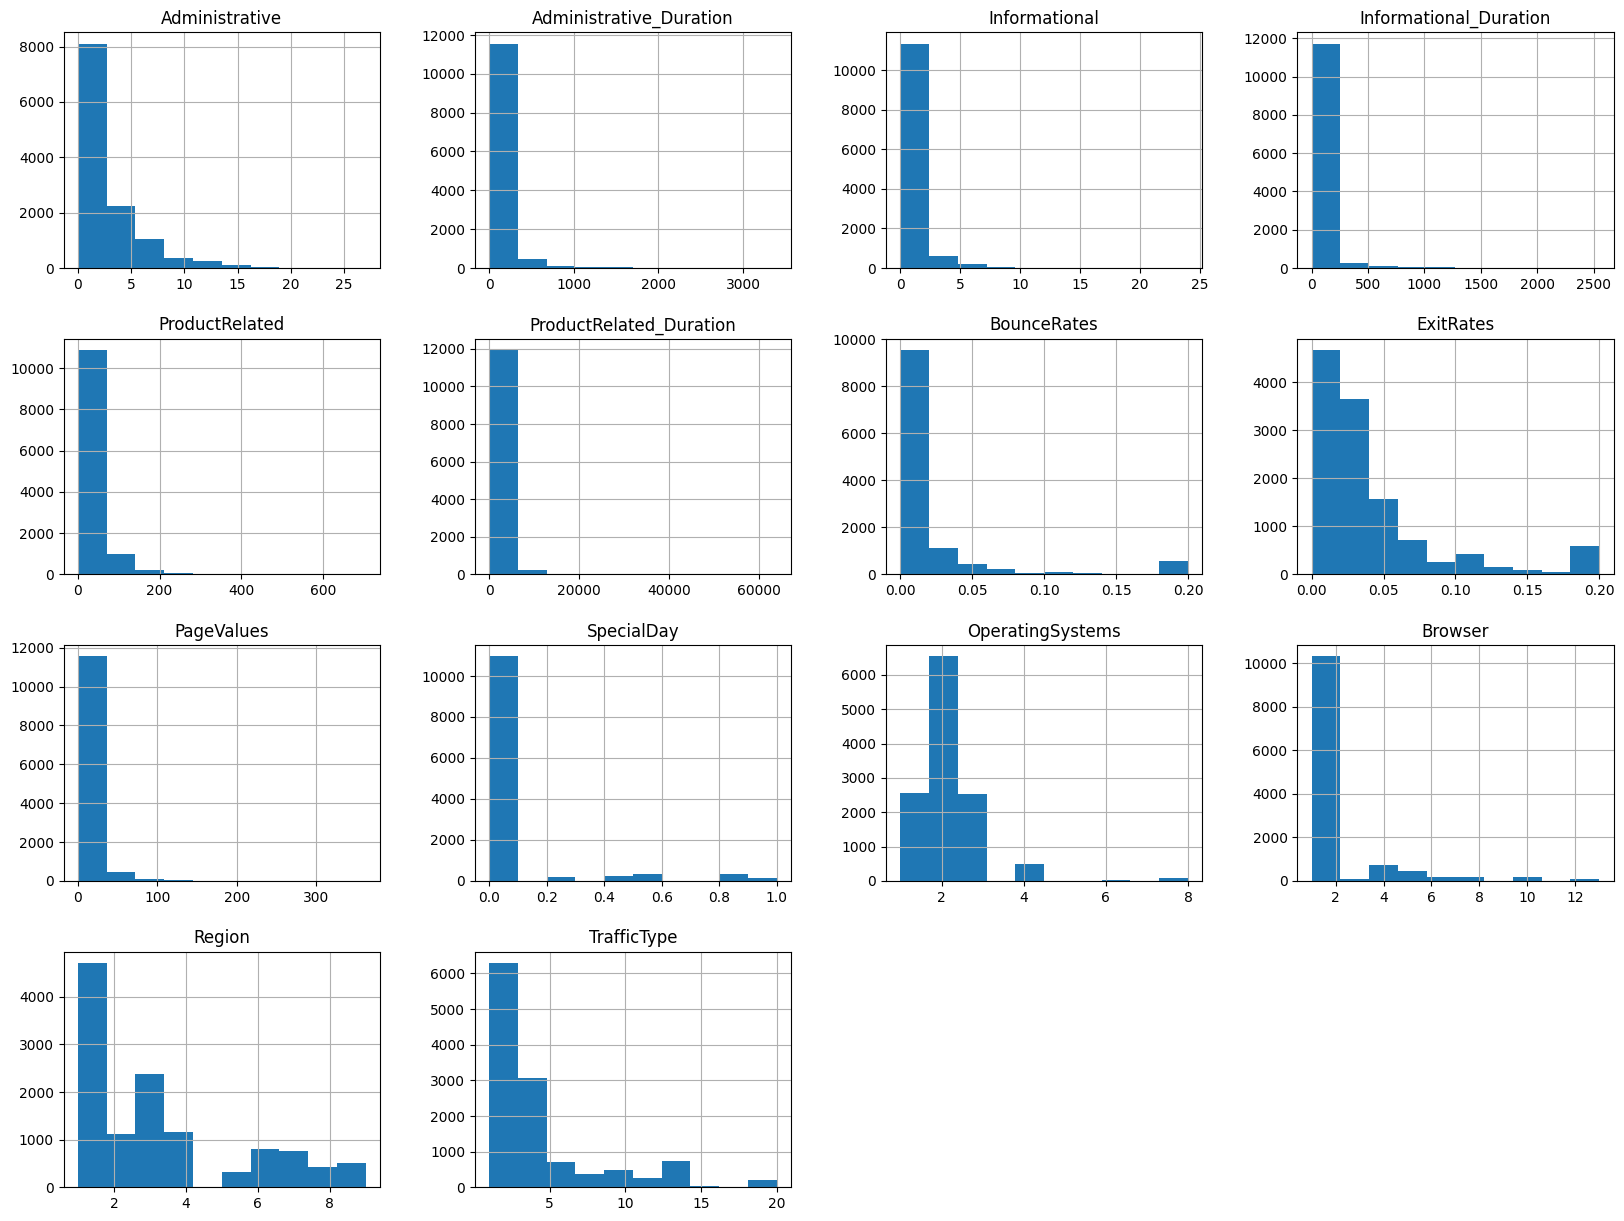

In [9]:
# Histograms for numerical features
df.hist(figsize=(20,15))
plt.show()

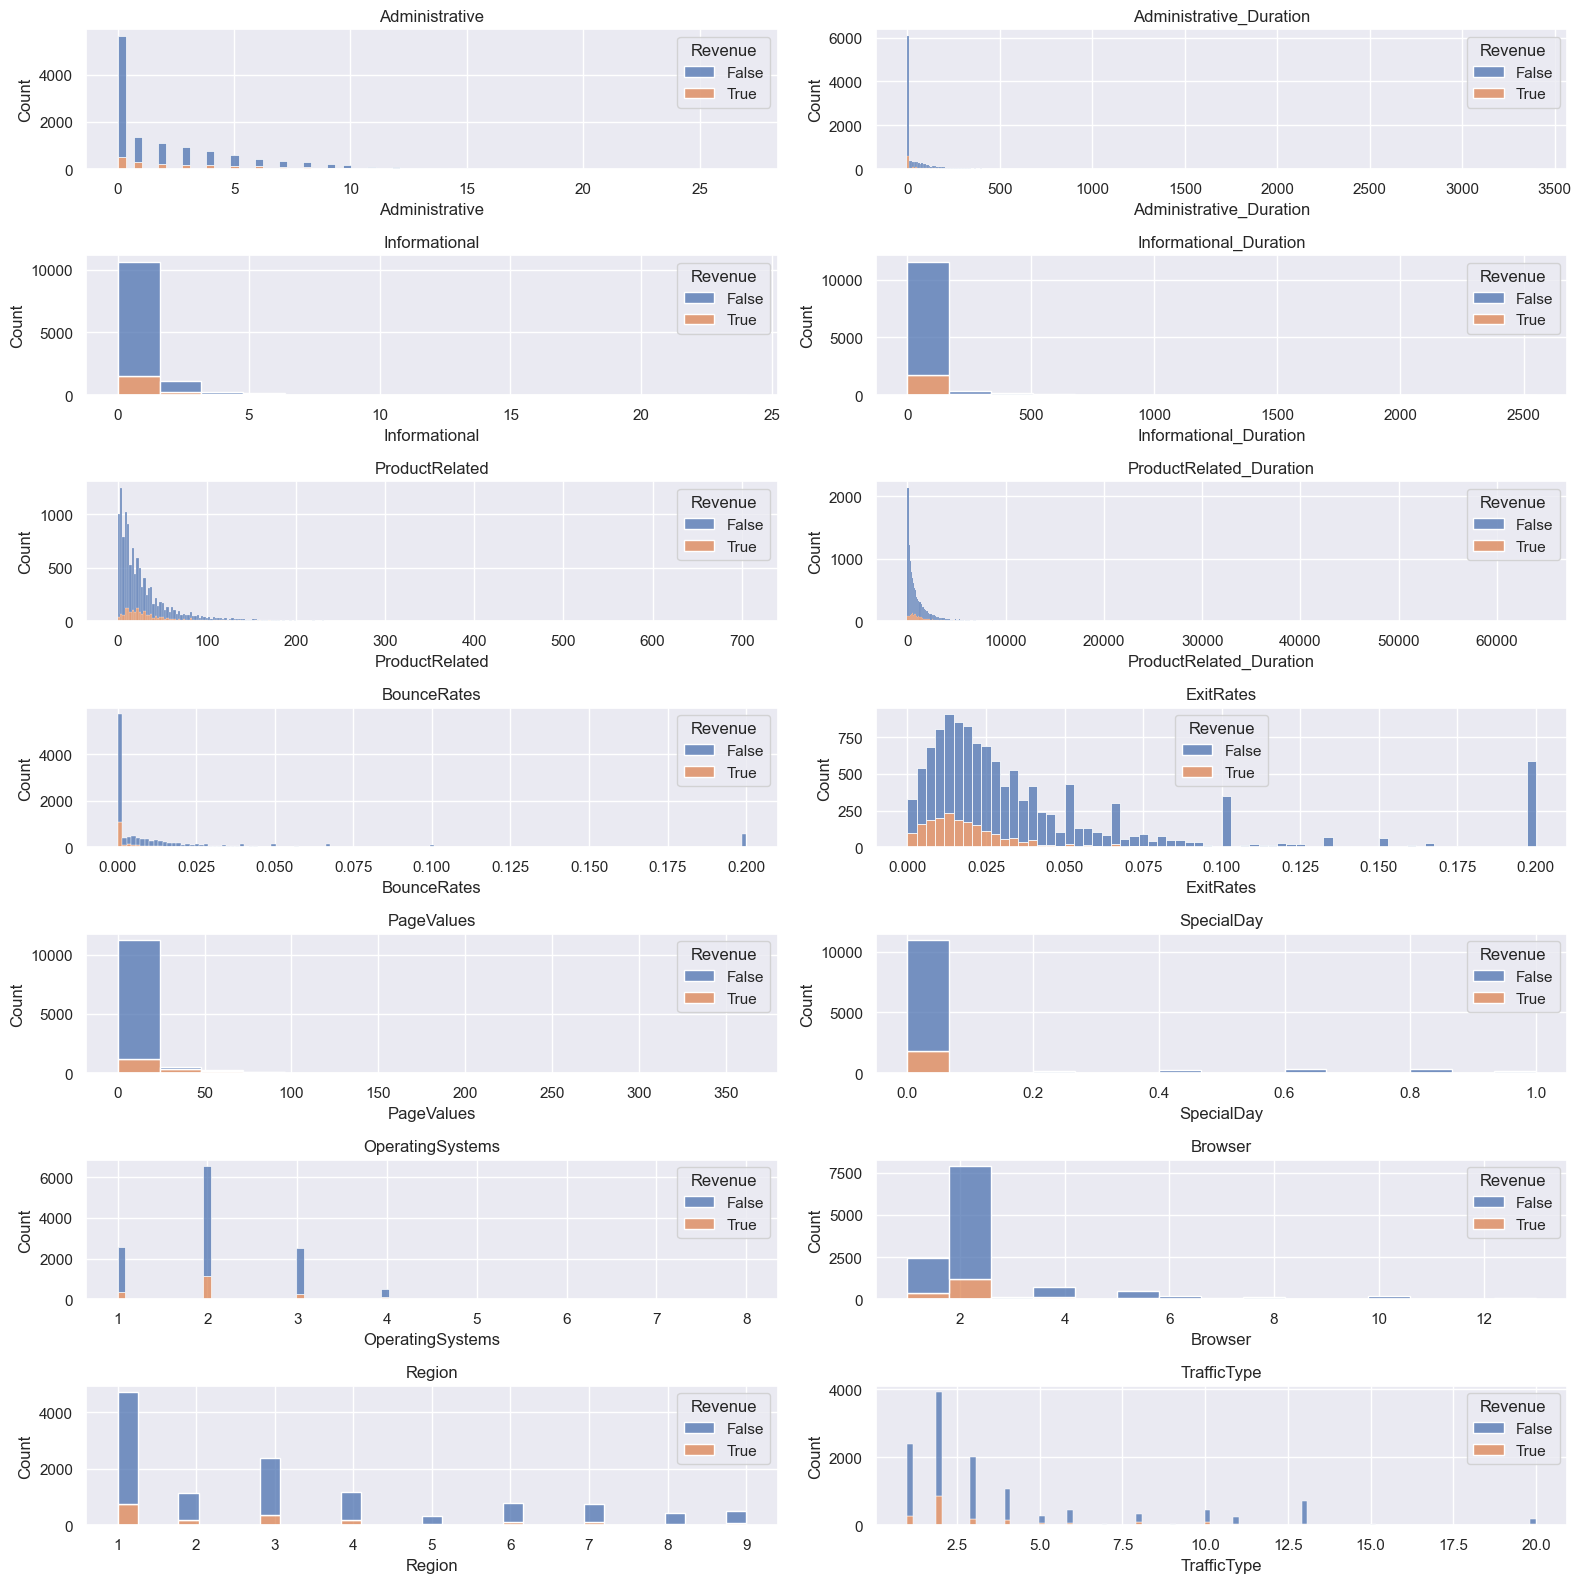

In [49]:
# Histograms for numerical features
fig, axes = plt.subplots(7, 2, figsize=(16, 16))

for col, ax in zip(df.select_dtypes(include='number').columns, axes.flatten()):
    sns.histplot(data=df, x=col, hue="Revenue", multiple='stack', ax=ax) # Plot the histogram for each column
    ax.set_title(col)

fig.tight_layout()

plt.show()

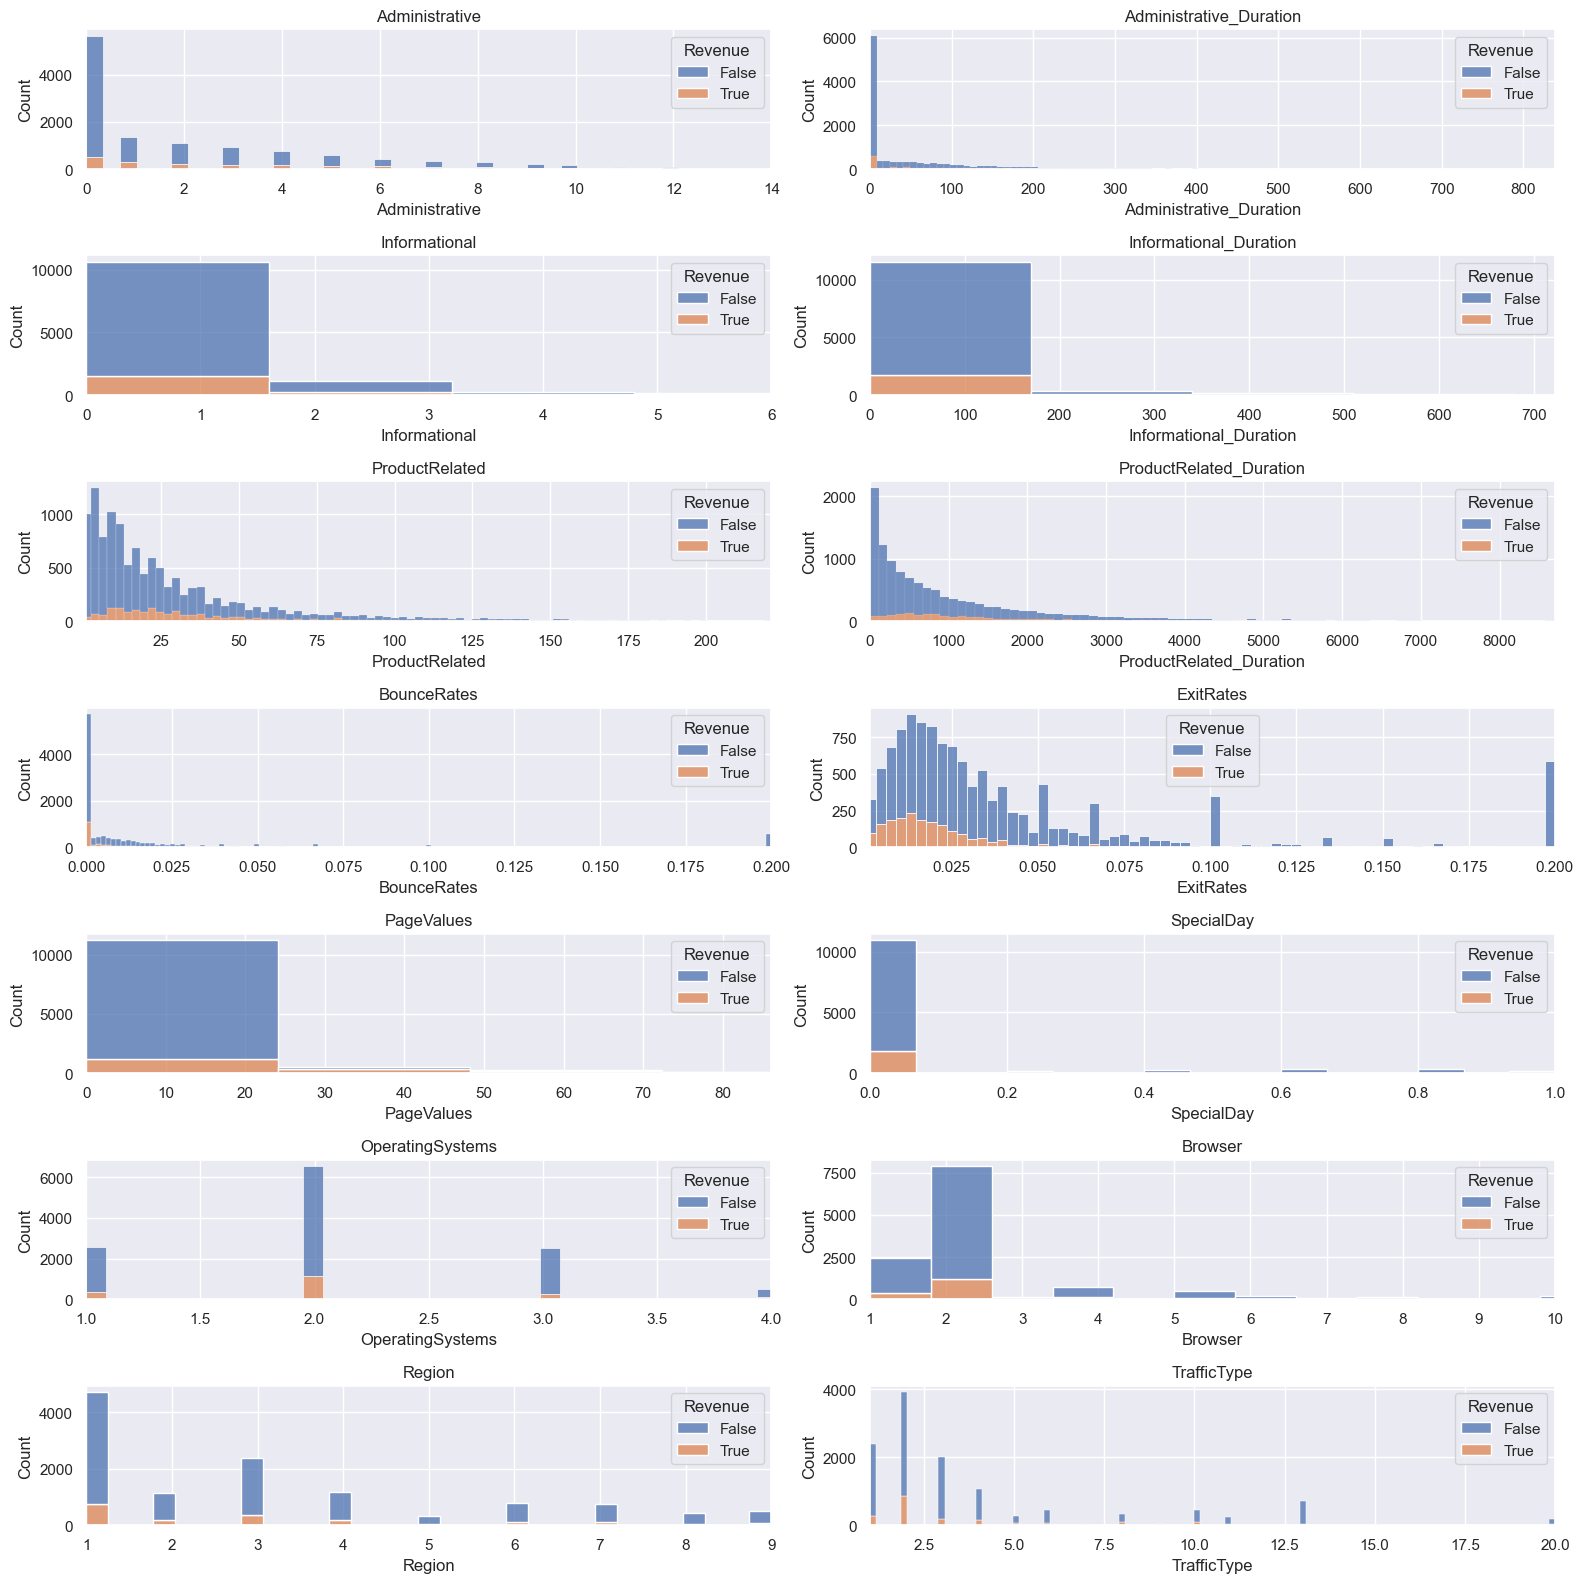

In [52]:
# Histograms for numerical features
fig, axes = plt.subplots(7, 2, figsize=(16, 16))

for col, ax in zip(df.select_dtypes(include='number').columns, axes.flatten()):
    sns.histplot(data=df, x=col, hue="Revenue", multiple='stack', ax=ax)
    q_low = df[col].quantile(0.01)
    q_high = df[col].quantile(0.99)
    ax.set_xlim(q_low, q_high)
    ax.set_title(col)

fig.tight_layout()
plt.show()

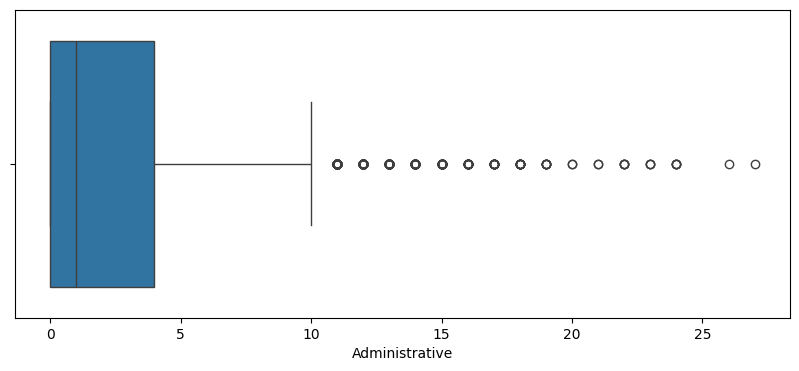

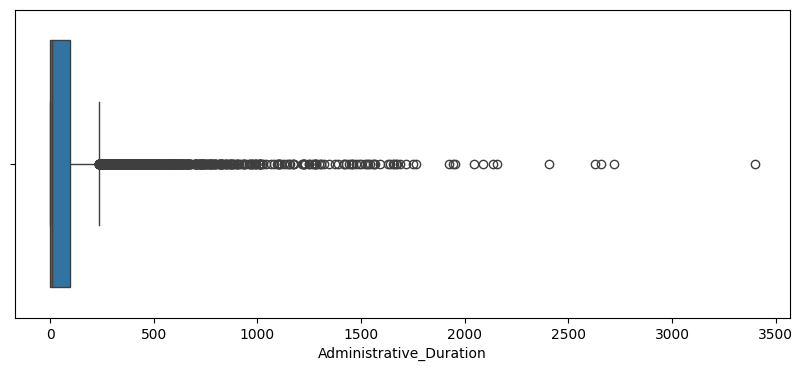

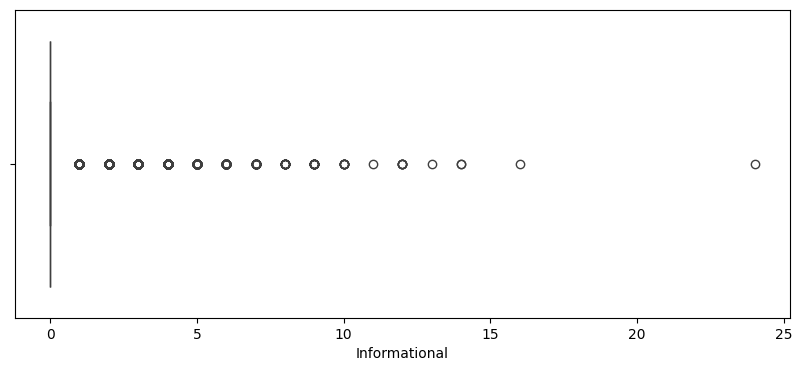

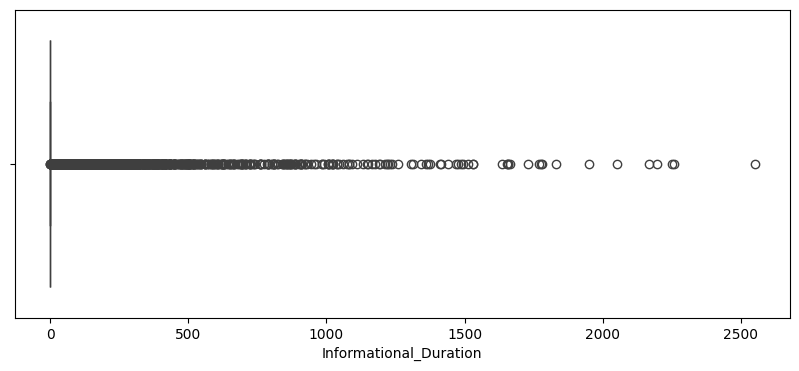

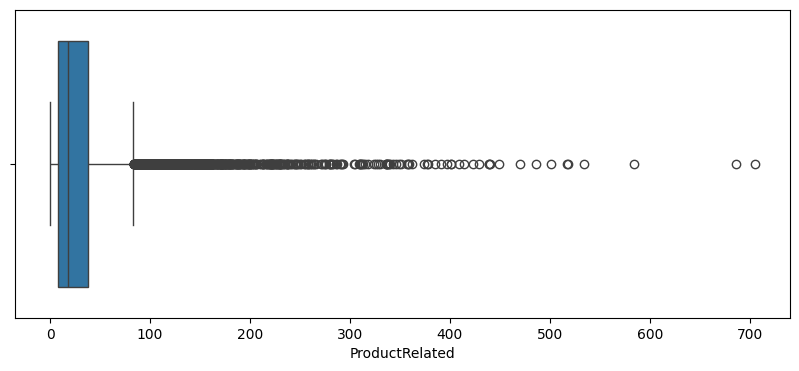

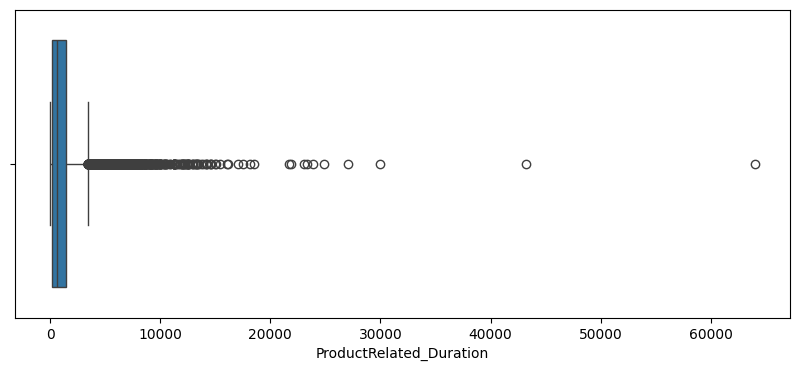

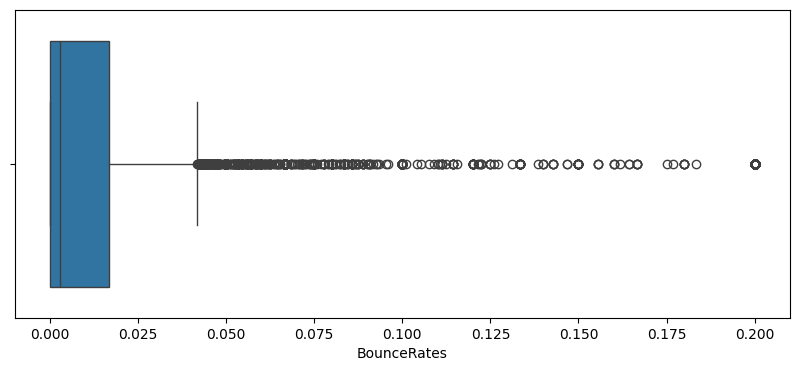

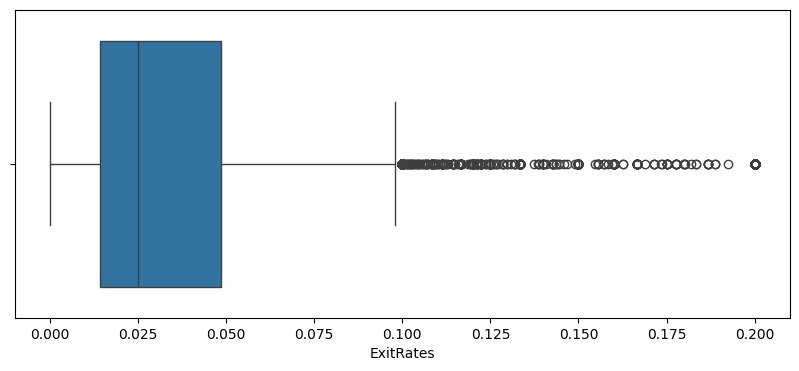

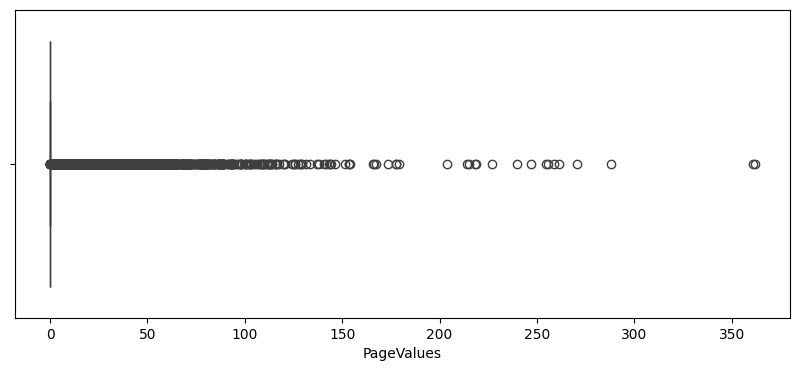

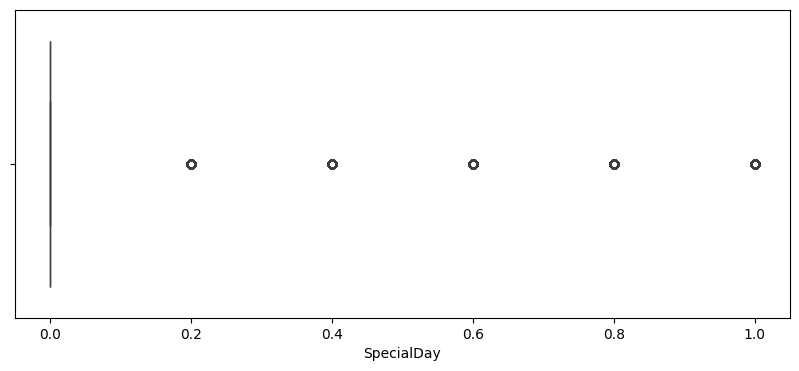

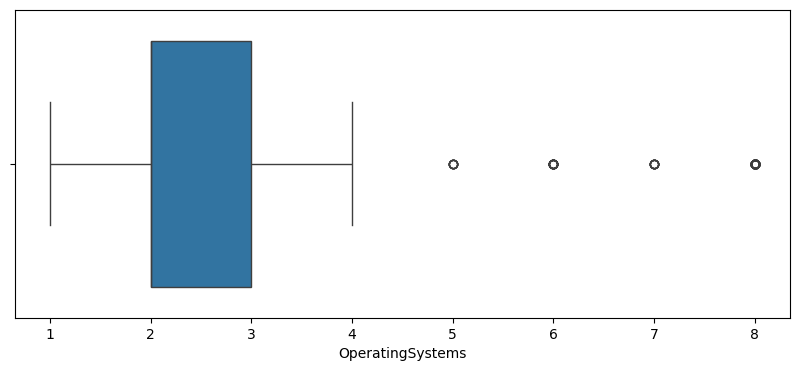

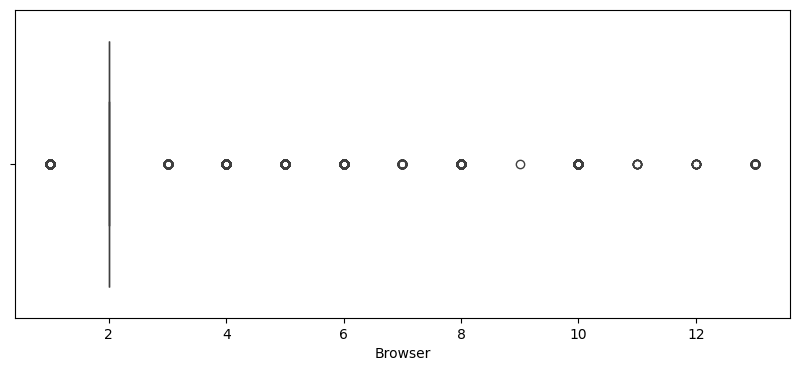

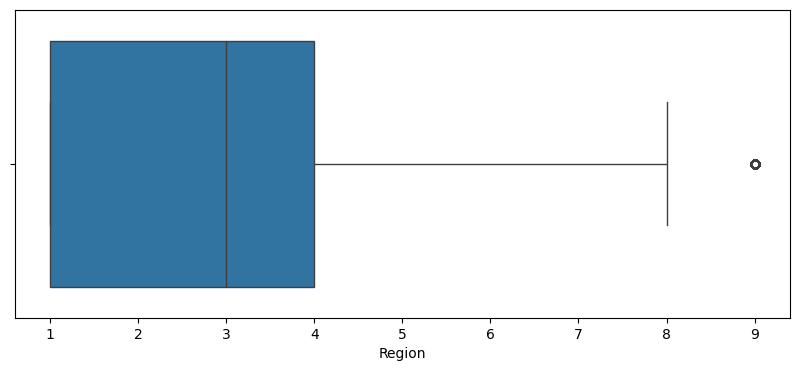

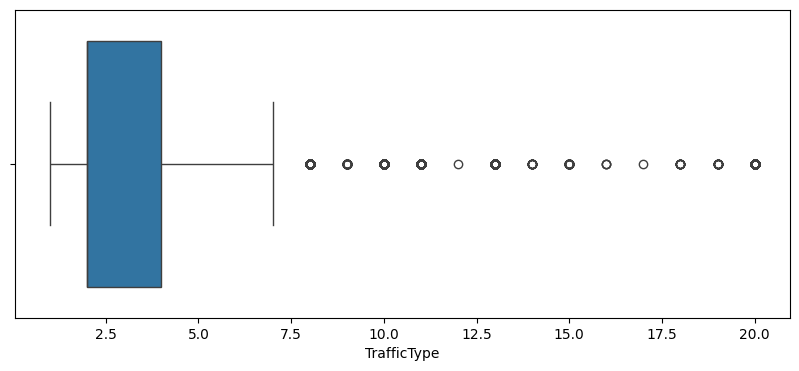

In [152]:
# Box plots for numerical features to spot outliers
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.show()

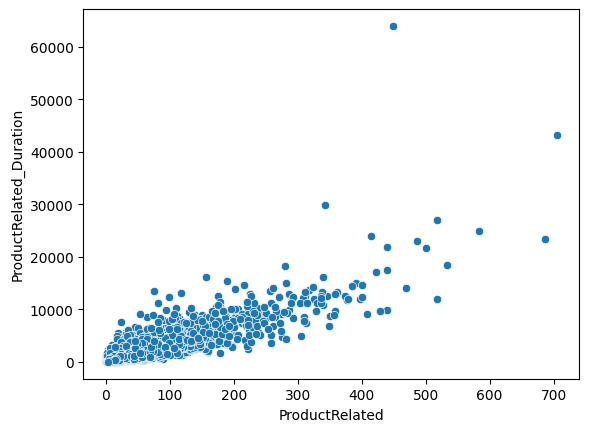

In [153]:
# Scatter plot example for bivariate analysis
sns.scatterplot(data=df, x='ProductRelated', y='ProductRelated_Duration')
plt.show()

In [154]:
# Categorical value counts
for column in df.select_dtypes(include='object').columns:
    print(df[column].value_counts())

Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: count, dtype: int64
VisitorType
Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: count, dtype: int64


## Preprocessing

### Encoding the Month feature using cyclical encoding

In [155]:
# Assign a numerical value to each month
month_to_num = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5,
    'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 
    'Oct': 10, 'Nov': 11, 'Dec': 12
}
df['month_num'] = df['Month'].map(month_to_num)

# Encode with sine and cosine
df['month_sin'] = np.sin((df['month_num'] - 1) * (2. * np.pi / 12))
df['month_cos'] = np.cos((df['month_num'] - 1) * (2. * np.pi / 12))

df.drop(columns=['Month', 'month_num'], inplace=True)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,month_sin,month_cos
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,Returning_Visitor,False,False,0.5,0.866025
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,Returning_Visitor,False,False,0.5,0.866025
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,Returning_Visitor,False,False,0.5,0.866025
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,Returning_Visitor,False,False,0.5,0.866025
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,Returning_Visitor,True,False,0.5,0.866025


### Encoding VisitorType feature

In [156]:
df['VisitorType_Returning_Visitor'] = 0
df['VisitorType_New_Visitor'] = 0
df['VisitorType_Other'] = 0

df.loc[df['VisitorType']=='Returning_Visitor', 'VisitorType_Returning_Visitor'] = 1
df.loc[df['VisitorType']=='New_Visitor', 'VisitorType_New_Visitor'] = 1
df.loc[df['VisitorType']=='Other', 'VisitorType_Other'] = 1

df.drop(columns=['VisitorType'], inplace=True)

## Correlational Matrix

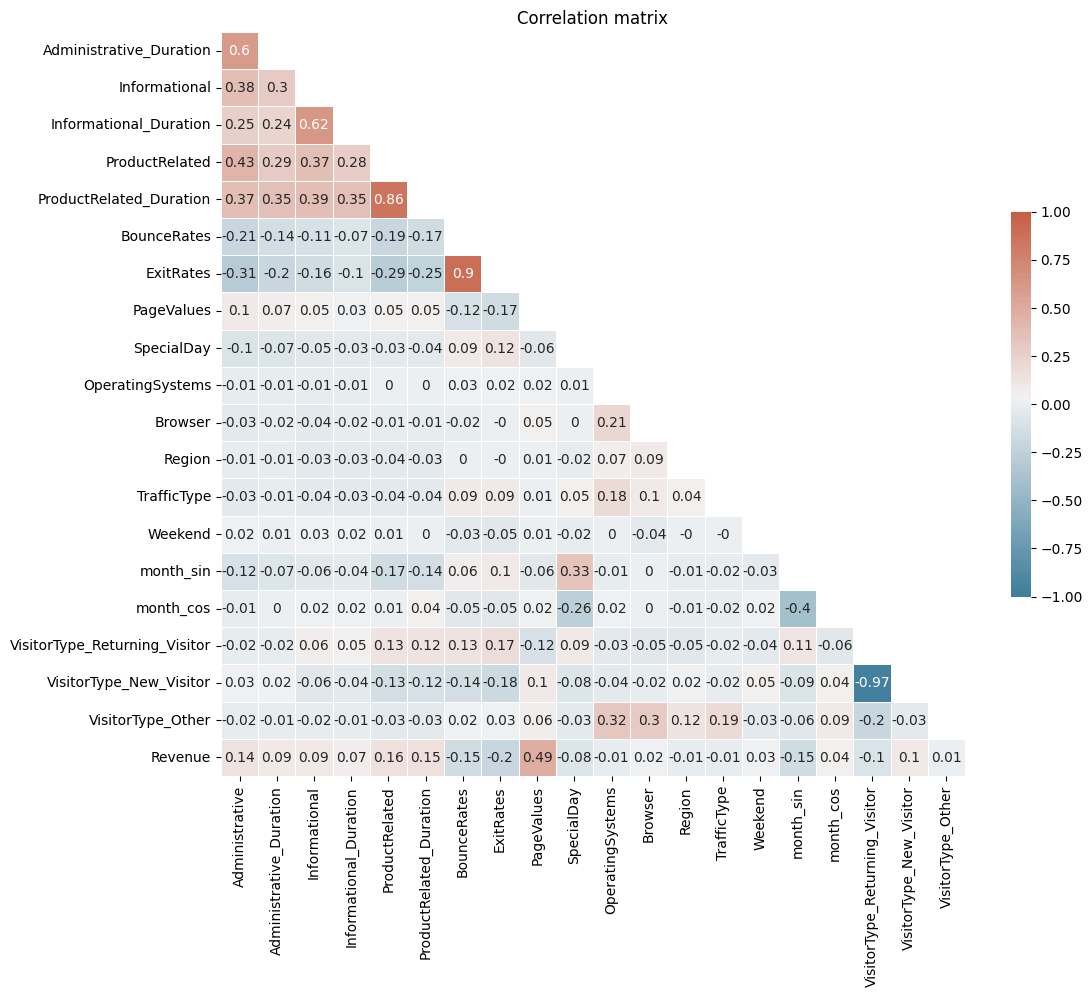

In [157]:
# Moving the Revenue label to the end for better visualisation
cols = [c for c in df if c != 'Revenue'] + ['Revenue']
df = df[cols]

# Correlational Matrix
df_corr_matrix = df.corr().round(2)

# Plotting
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(df_corr_matrix))
cmap = sns.diverging_palette(230, 20, n=100)
ax = sns.heatmap(df_corr_matrix, mask=mask, annot=True, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xlim(0,len(df_corr_matrix)-1)
ax.set_ylim(len(df_corr_matrix),1)
ax.collections[0].set_clim(-1,1) 
plt.title('Correlation matrix')
plt.show()

## Train-test split

In [158]:
y = df['Revenue'] # Labels
X = df[df.columns.difference(['Revenue', 'VisitorType']).to_list()] # Features

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline

In [160]:
# Defining baseling using Random Classifier
majority_class_baseline = DummyClassifier(strategy='uniform')
majority_class_baseline.fit(X_train, y_train)
y_pred_majority = majority_class_baseline.predict(X_test)

print("Random Baseline:")
print(classification_report(y_test, y_pred_majority))

Random Baseline:
              precision    recall  f1-score   support

       False       0.86      0.51      0.64      2079
        True       0.16      0.54      0.25       362

    accuracy                           0.51      2441
   macro avg       0.51      0.52      0.44      2441
weighted avg       0.76      0.51      0.58      2441



## Logistic Regression

Accuracy: 0.88529291274068
Confusion Matrix:
[[2033   46]
 [ 234  128]]
Precision: 0.74
Recall: 0.35
F1 Score: 0.48


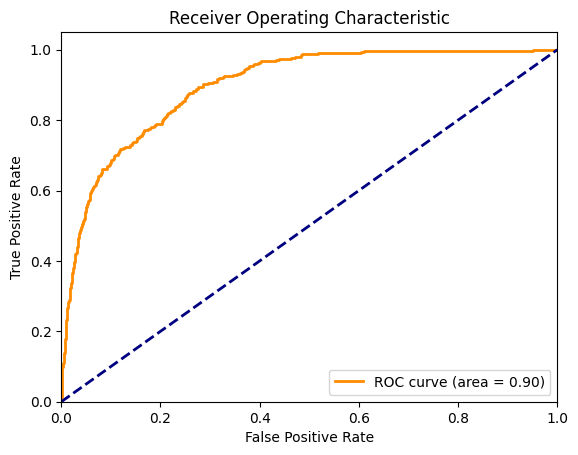

In [161]:
# Create a pipeline that first scales the data then applies logistic regression
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000, solver='lbfgs'))

# Fit and predict
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Predict probabilities for the test data
y_probs = pipe.predict_proba(X_test)[:, 1]  # get the probability of the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate Precision, Recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()